# TP2



In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile

import sounddevice

### 1 Random signals properties

##### 1.1  Gaussian noise

In [2]:
#1- Gaussian IID random signal

def gaussian (Ns, sigma):
    G = sigma * np.random.randn(Ns)
    return G

Ns = 1024
sqsigma = 1.2
sigma = np.sqrt(sqsigma)
G = gaussian(Ns,sigma)

empirical variance=  1.1233639592658204 theoretical variance=  1.0954451150103321


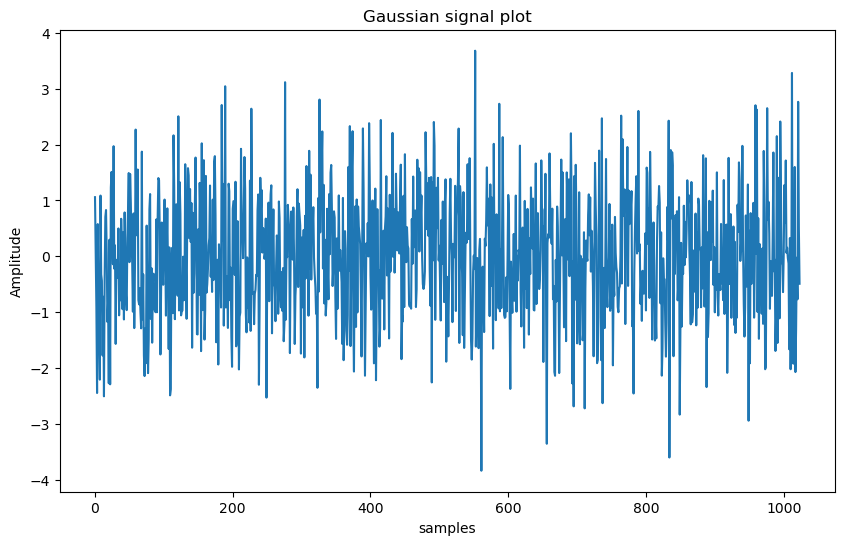

In [3]:
#2-
pl.figure(figsize=(10, 6))
pl.plot(G)
pl.title("Gaussian signal plot")
pl.xlabel("samples")
pl.ylabel("Amplitude")
variance = np.std(G)
print( "empirical variance= ", variance, "theoretical variance= ", sigma)

The empirical variance is close to the theoretical value, as expected for a large sample size (Ns = 1024). It is not exactly the same because of the finite window.

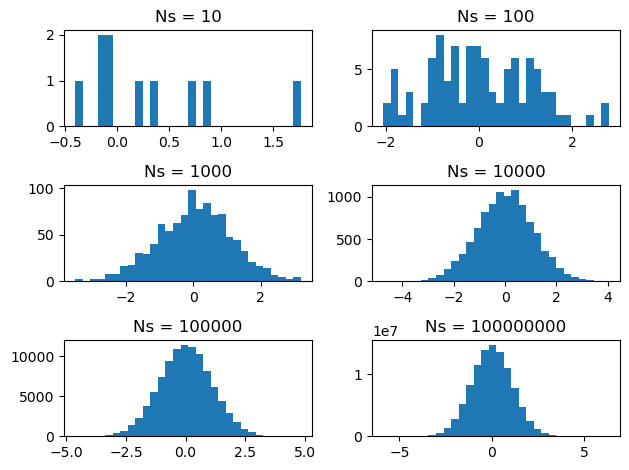

In [4]:
#3- Histograms of the signal for different Ns values
samples = [10,100,1000,10000,100000,100000000]
for i, n  in enumerate (samples,1):
    g = gaussian(n,sigma)
    pl.subplot(3, 2, i)
    pl.hist(g,bins=30)
    pl.title(f"Ns = {n}")
pl.tight_layout()
pl.show()

The histogram keeps the same allure for different realizations of the signal (Ns=1040) with a high central value and low values on the queues (roughly resembling a Gaussian shape)

The shape of the distribution approaches a true Gaussian as $N_s$ increases. For a small sample size of 10 the histogram does not resemble a Gaussian due to very limited data. As $N_s$ grows beyond 1000 the histogram becomes smoother and looks more like a bell curve. Due to the law of large numbers, with a very large $N_s$ the curve aligns even more closely with the Gaussian distribution

In [5]:
#4- Empirical autocorrelation
autocor = sp.signal.correlate(G,G, mode ='full')/Ns #why Ns
print(autocor)

[-0.00050792  0.00048166  0.00332987 ...  0.00332987  0.00048166
 -0.00050792]


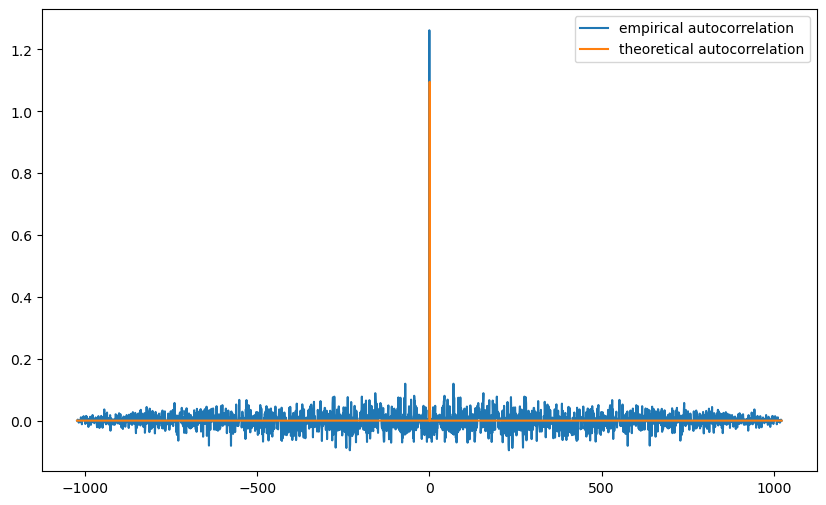

In [6]:
#5- Plotting empirical and theoretical autocorrelation

pl.figure(figsize=(10, 6))
lags = np.arange(-Ns+1, Ns)
pl.plot(lags, autocor, label = "empirical autocorrelation")

theoretical_autocorr = np.zeros(Ns*2-1)
theoretical_autocorr[Ns] = sigma
pl.plot(lags,theoretical_autocorr, label = "theoretical autocorrelation")
pl.legend()

The theoretical autocorrelation for white noise is $ \sigma^2 \delta(n)$ where $\delta$ is the dirac function.

Empirical autocorrelation : $R_W(n) = \mathbb{E}[x[k] \cdot x[k + n]]$

We do recover the variance($\approx 1.2$) on the empirical plot for $n=0$ (correlation between the signal and itself $\mathbb{E}[x[k]^2]$)

However it is not a perfect dirac as there is noise at the edges $n\neq0$ because we are computing correlation on fewer and fewer sample pairs because the signal is finite. Also, when using mode='full', the function computes correlations even when the signals only partially overlap. As we move towards the edges, fewer samples are involved in the correlation computation due to the zero-padding, leading to lower amplitudes at the extremities

[-0.51623069+0.00000000e+00j  2.51177706+6.66452376e-18j
  0.85493926+0.00000000e+00j ...  0.94621083+1.33890213e-16j
  0.85493926+4.60751109e-17j  2.51177706+9.66556543e-17j]
Is the PSD positive real? False


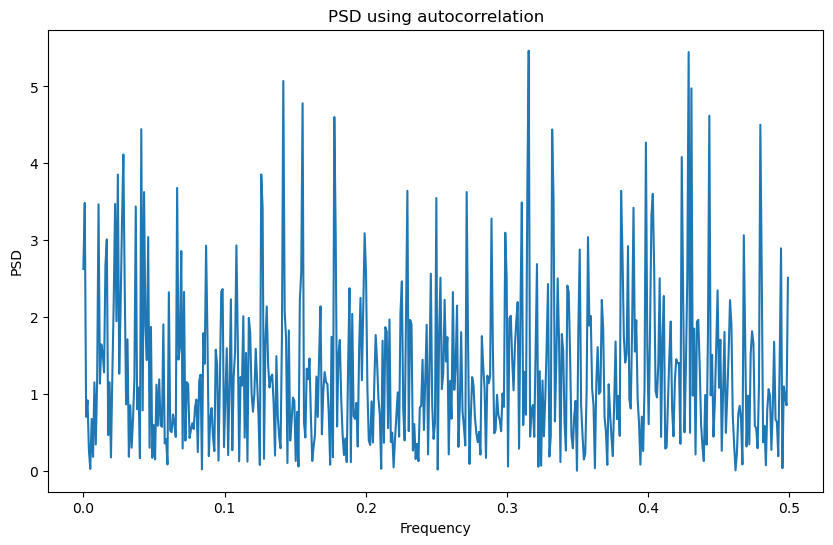

In [7]:
#6- PSD 
autocor2 = sp.signal.correlate(G,G, mode ='same')/Ns
Sw = np.fft.fft(np.fft.ifftshift(autocor2))
print(Sw)
Sw = np.fft.fftshift(Sw)
freqs = np.fft.fftfreq(Ns)
pl.figure(figsize=(10, 6))
pl.plot(freqs[:Ns // 2], np.abs(Sw[:Ns // 2]), label="PSD (Real Part)")
pl.xlabel("Frequency")
pl.ylabel("PSD")
pl.title("PSD using autocorrelation")

is_positive_real = np.all(np.imag(Sw) == 0) and np.all(np.abs >= 0)
print(f"Is the PSD positive real? {is_positive_real}")

The autocorrelation function and the power spectral density (PSD) are Fourier transform pairs. In theory, for a real signal the PSD should be both positive and real. However, due to the finite sample size and computational rounding errors inherent in numerical methods, we see that in the results obtained, the imaginary parts of the PSD are negligibly small, likely stemming from numerical precision limits rather than meaningful signal characteristics.

Text(0.5, 1.0, 'PSD as square magnitude of FFT')

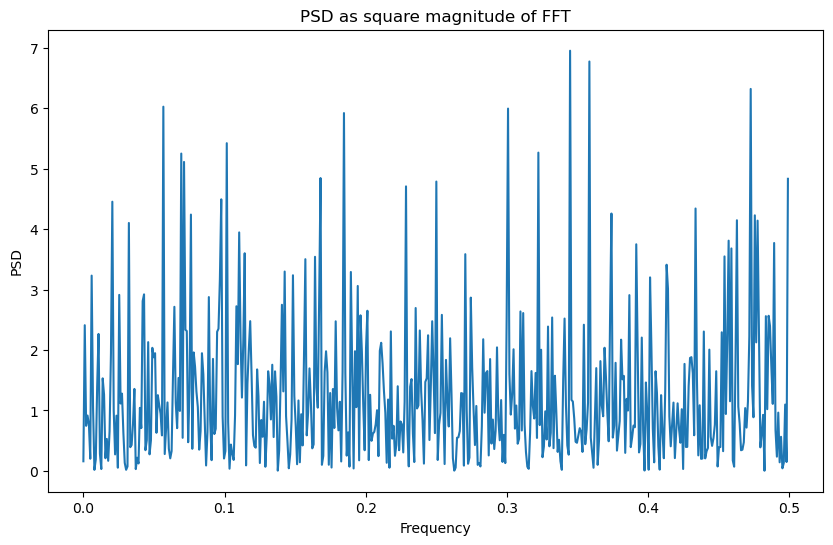

In [8]:
#7- another computation of PSD as square of FFt of w
W = np.fft.fft(G)
Sw2 = np.abs(W)**2/Ns
pl.figure(figsize=(10, 6))
pl.plot(freqs[:Ns // 2], Sw2[:Ns // 2])
pl.xlabel("Frequency")
pl.ylabel("PSD")
pl.title("PSD as square magnitude of FFT")


/Users/imanemokhtatif/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


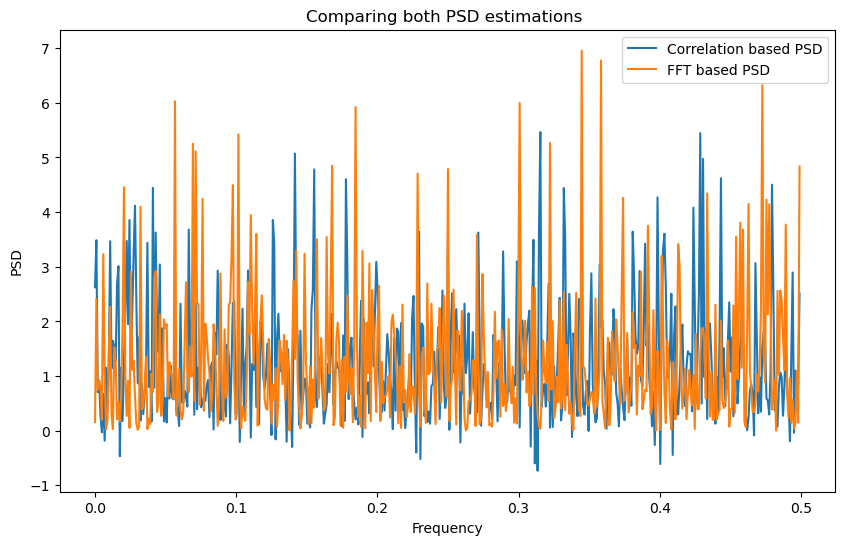

In [9]:
# 8 - On the same graph
pl.figure(figsize=(10, 6))
pl.plot(freqs[:Ns // 2], Sw[:Ns // 2], label = "Correlation based PSD")
pl.plot(freqs[:Ns // 2], Sw2[:Ns // 2], label = "FFT based PSD")
pl.xlabel("Frequency")
pl.ylabel("PSD")
pl.title("Comparing both PSD estimations ")
pl.legend()
pl.show()


The two signals are quite similar but not identical. The difference arises because the autocorrelation-based estimation accumulates two sources of uncertainty: the empirical autocorrelation is not exact, and additional inaccuracies are introduced during the calculation. In contrast, the squared magnitude of the FFT directly captures the frequency content, but it may suffer from spectral leakage or windowing effects.

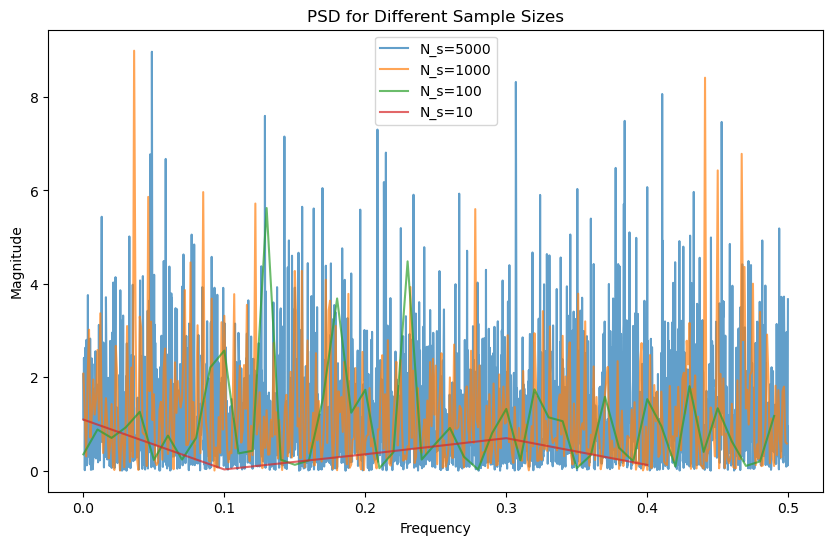

In [10]:
Ns_values = [5000,1000,100,10]
pl.figure(figsize=(10, 6))
for n in Ns_values:
    g = gaussian(n, sigma)
    Sw = np.abs(np.fft.fft(g))**2/n
    freqs = np.fft.fftfreq(n)
    pl.plot(freqs[:n // 2], Sw[:n // 2], alpha = 0.7, label=f'N_s={n}')
pl.title("PSD for Different Sample Sizes")
pl.xlabel("Frequency")
pl.ylabel("Magnitude")
pl.legend()
pl.show()

Larger sample sizes provide better frequency resolution and more detailed spectral content. While smaller sample sizes result in more averaged/smoothed estimates, losing fine spectral details.However in terms of variance this means that large samples show more fluctuations than smaller ones that are smoother.

In conclusion Larger sample sizes generally provide more statistically reliable estimates. But there's a fundamental trade-off between variance and resolution. Larger $N_s$ gives better frequency resolution but more variance in the estimate.

In [11]:
#10-
fs = 8000 #KHz?
duration = 3
noise = gaussian(duration*fs, sigma)
scipy.io.wavfile.write('GaussianNoise.wav', fs, noise)

#### 1.2 Noisy sine wave

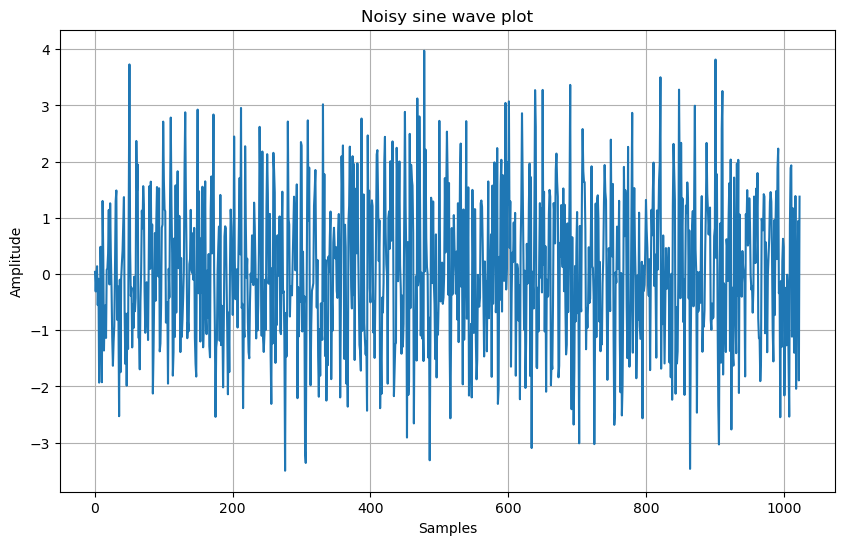

In [12]:
#1-
f0 = 0.1
N = Ns
time = np.arange(N)
phi = np.random.uniform(0, 2 * np.pi) 
X = np.cos(2*np.pi*f0*time + phi) + gaussian(N,sigma)
pl.figure(figsize=(10, 6))
pl.plot(time, X)
pl.title("Noisy sine wave plot")
pl.xlabel("Samples")
pl.ylabel("Amplitude")
pl.grid(True)
pl.show()

The sine wave is not visible because the gaussian noise is obscuring it


Text(0.5, 1.0, 'Empirical Autocorrelation')

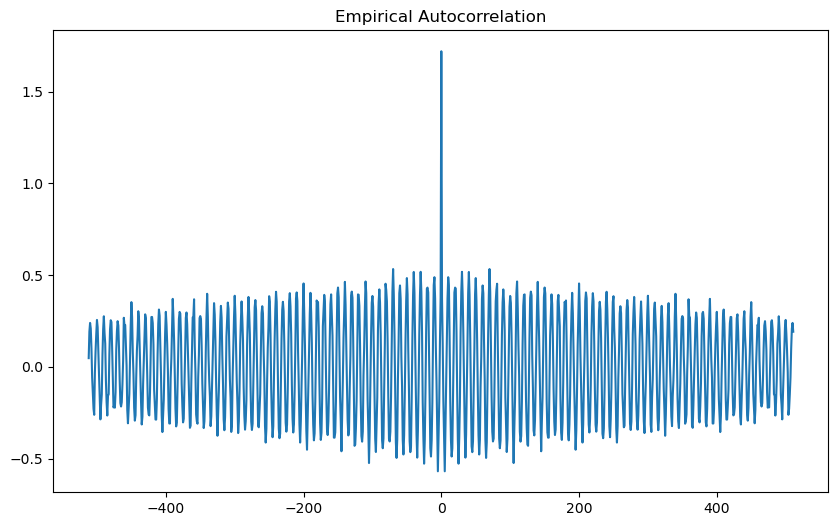

In [13]:
#2 Empirical autocorrelation
autocor_sine = sp.signal.correlate(X,X, mode ='same')/Ns
lags = np.arange(-Ns // 2, Ns // 2)
pl.figure(figsize=(10, 6))
pl.plot(lags, autocor_sine)
pl.title("Empirical Autocorrelation")


In the empirical autocorrelation plot we recognize the peak variance at n=0 corresponding to the gaussian noise from the previosu section. The noise on the edges follows a cosine shape with varying amplitude because of finite sample effects.

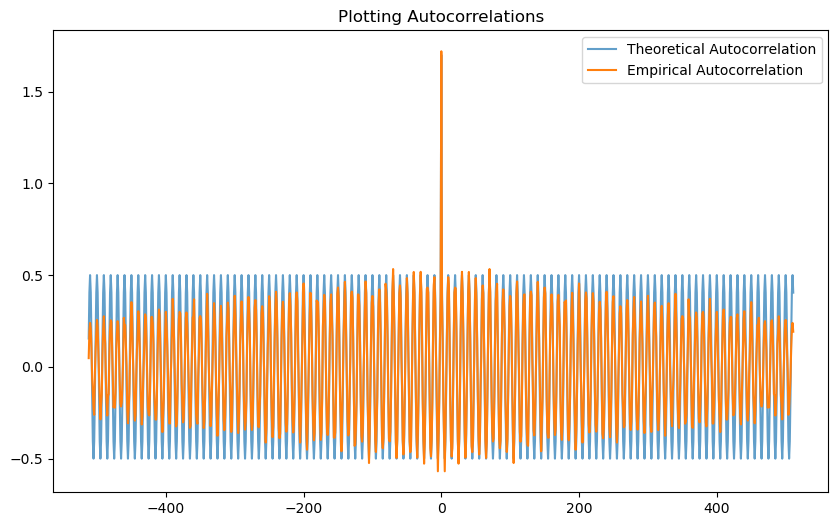

In [14]:
#3- Thoretical autocorrelation
theoretical_autocorr = 0.5 * np.cos(2 * np.pi * f0 * lags)
theoretical_autocorr[Ns // 2] += sqsigma
pl.figure(figsize=(10, 6))
pl.plot(lags,theoretical_autocorr, label = "Theoretical Autocorrelation", alpha=0.7)
pl.plot(lags, autocor_sine, label="Empirical Autocorrelation") #empirical
pl.title("Plotting Autocorrelations")
pl.legend()

For independent signals, the autocorrelation of their sum is the sum of their autocorrelations \
For the cosine component :

\begin{aligned}
R1[k] &= \mathbb{E}[\cos(2\pi f_0 n + \phi)\cos(2\pi f_0 (n+k)+\phi) \\
& = \mathbb{E}[\frac{1}{2}[\cos(2\pi f_0 k) + \cos(4\pi f_0 +2\pi f_0 k + 2\phi)]]\\
& = \frac{1}{2}\cos(2\pi f_0 k) + 0  
\end{aligned}

(because $\phi$ is uniformly distributed)

For the gaussian noise:
$R2[k] = \sigma^2 \delta(k)$

So the overall theoretical autocorrelation of the signal is : $R[k]=\frac{1}{2}\cos(2\pi f_0 k) + \sigma^2 \delta(k)$



In [15]:
#4-PSD
W = np.fft.fft(X)
PSD_sine = np.abs(W)**2

Text(0, 0.5, 'PSD')

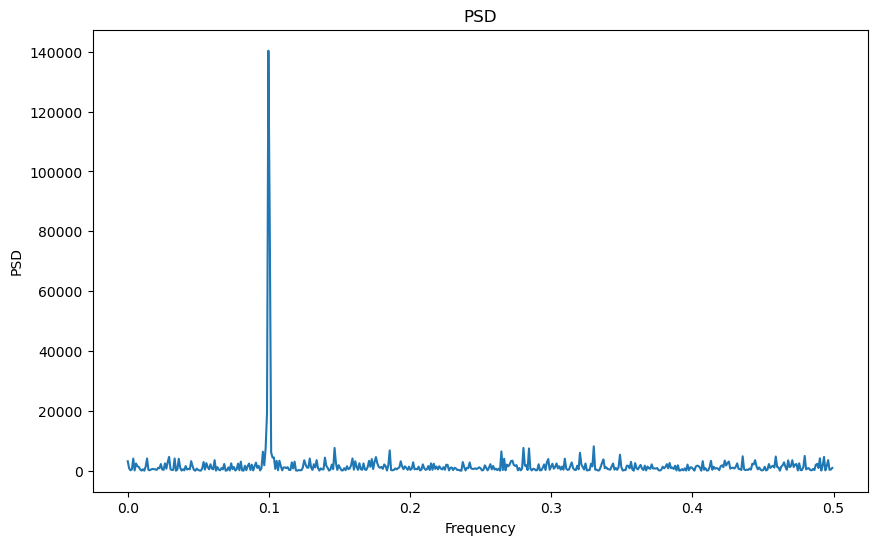

In [16]:
#5-
pl.figure(figsize=(10, 6))
freqs = np.fft.fftfreq(Ns)
pl.plot(freqs[:Ns // 2], PSD_sine[:Ns // 2])
pl.title("PSD")
pl.xlabel("Frequency")
pl.ylabel("PSD")

There is a clearly distinguishable peak at the frequency $f_0=0.1$ due to the cosine component. The PSD allows to recover the signal's fundamental frequency regardless of the noise

In [17]:
#6-
Ns = 3*8000
fs = 8000
X = np.cos(2*np.pi*f0*np.arange(Ns)+phi)+gaussian(Ns,sigma)
scipy.io.wavfile.write('NoisySine.wav', fs, X)


The iid noise sounds like static. In this signal we can hear, along with the static, a constant beep sound, it probably corresponds to the frequency 0.1*8000=800Hz of the cosine.

### 2 AR modeling

##### 2.1 Simulated signals

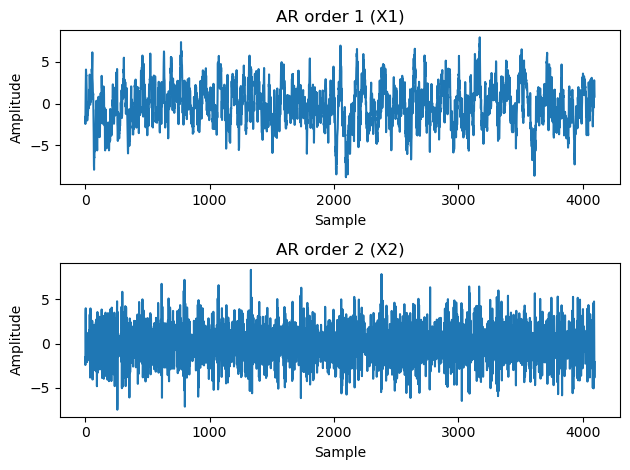

In [18]:
#1-
Ns = 4096
w = gaussian (Ns, sigma)
a1 = [1, -0.9]
x1 = sp.signal.lfilter([1], a1, w)
a2 = [1, -0.9, 0.8] 
x2 = sp.signal.lfilter([1], a2, w)

# Plot x1
pl.subplot(2, 1, 1)
pl.plot(x1)
pl.title("AR order 1 (X1)")
pl.xlabel("Sample")
pl.ylabel("Amplitude")

# Plot x2
pl.subplot(2, 1, 2)
pl.plot(x2)
pl.title("AR order 2 (X2)")
pl.xlabel("Sample")
pl.ylabel("Amplitude")

pl.tight_layout()
pl.show()


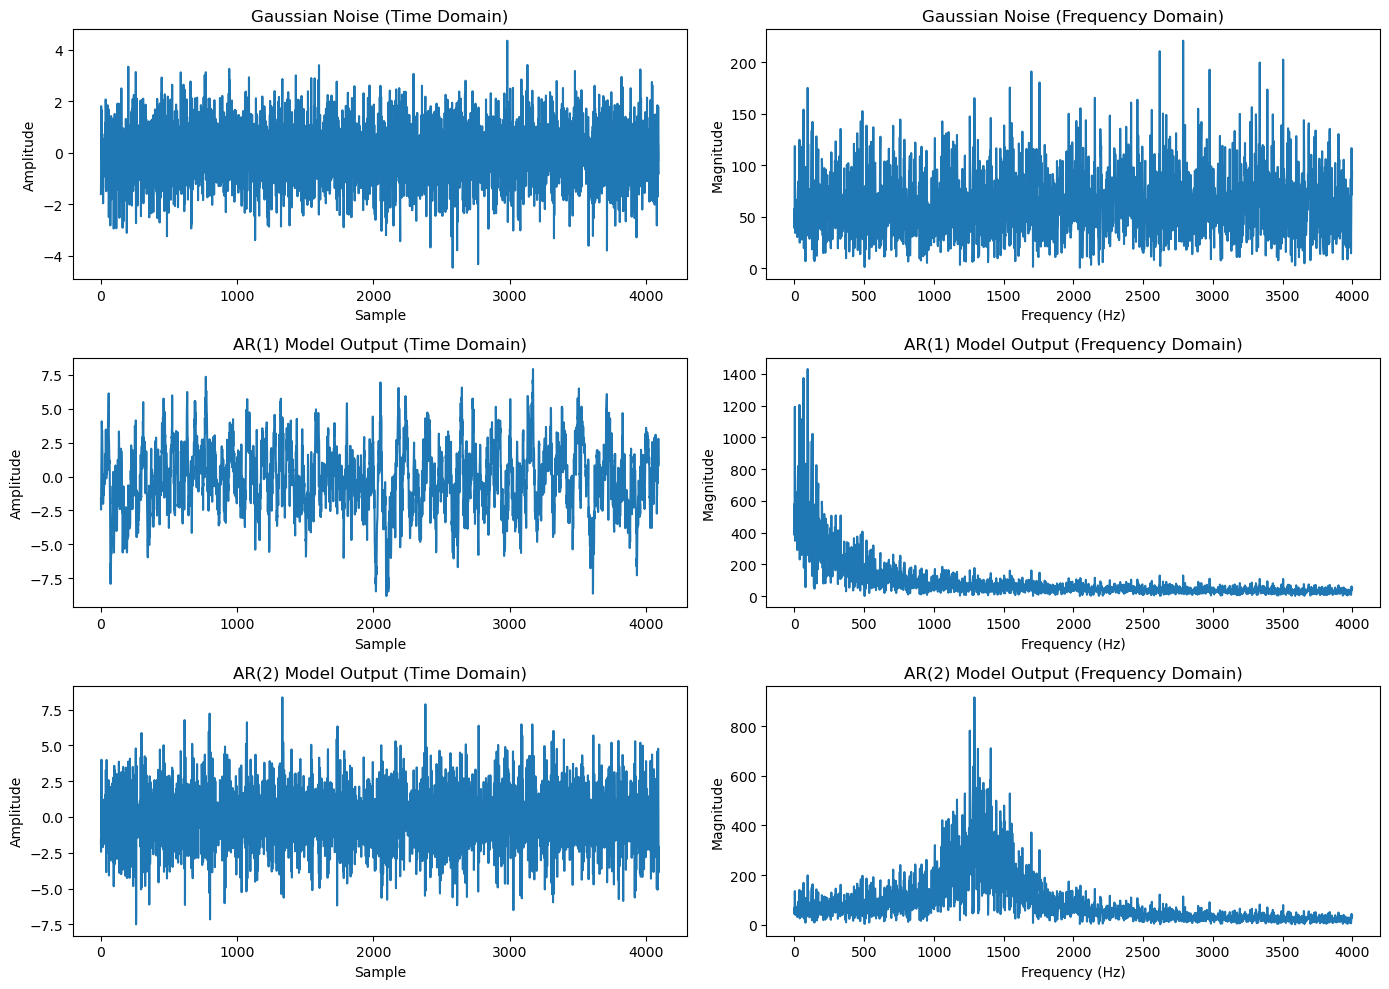

In [19]:
#2-FFTs and plots
W_f = np.fft.fft(w)
X1_f = np.fft.fft(x1)
X2_f = np.fft.fft(x2)
freqs = np.fft.fftfreq(Ns, 1/fs)

#time domain
pl.figure(figsize=(14, 10))

pl.subplot(3, 2, 1)
pl.plot(w)
pl.title("Gaussian Noise (Time Domain)")
pl.xlabel("Sample")
pl.ylabel("Amplitude")

pl.subplot(3, 2, 3)
pl.plot(x1)
pl.title("AR(1) Model Output (Time Domain)")
pl.xlabel("Sample")
pl.ylabel("Amplitude")

pl.subplot(3, 2, 5)
pl.plot(x2)
pl.title("AR(2) Model Output (Time Domain)")
pl.xlabel("Sample")
pl.ylabel("Amplitude")

#FFT magnitudes
pl.subplot(3, 2, 2)
pl.plot(freqs[:Ns//2], np.abs(W_f[:Ns//2]))
pl.title("Gaussian Noise (Frequency Domain)")
pl.xlabel("Frequency (Hz)")
pl.ylabel("Magnitude")

pl.subplot(3, 2, 4)
pl.plot(freqs[:Ns//2], np.abs(X1_f[:Ns//2]))
pl.title("AR(1) Model Output (Frequency Domain)")
pl.xlabel("Frequency (Hz)")
pl.ylabel("Magnitude")

pl.subplot(3, 2, 6)
pl.plot(freqs[:Ns//2], np.abs(X2_f[:Ns//2]))
pl.title("AR(2) Model Output (Frequency Domain)")
pl.xlabel("Frequency (Hz)")
pl.ylabel("Magnitude")

pl.tight_layout()
pl.show()


The AR models apply a filtering effect to the gaussian white noise.

The FFT of x1 has lower magnitude at higher frequencies, indicating that the AR(1) model acts as a basic low-pass filter, attenuating higher frequencies.

The FFT of x2 exhibits a peak around the frequency 1250 Hz, indicating that AR(2) model acts as a pass band. Due to its second-order nature,it provides more selective frequency filtering, with resonance at certain frequencies.

In [20]:
#3-
fs = 8000
length = 1
N = length*fs
w = gaussian (N, sigma)
x1 = sp.signal.lfilter([1], a1, w)
x1 = x1 / np.max(np.abs(x1))
scipy.io.wavfile.write('AR1.wav', fs, x1)
x2 = sp.signal.lfilter([1], a2, w)
x2 = x2 / np.max(np.abs(x2))
scipy.io.wavfile.write('AR2.wav', fs, x2)

x1 and x2 both sound like static but they are smoother than the gaussian noise because they contain less frequencies. x1 has a lower pitch than x2 and sounds muffled because it has lower frequencies.

In [21]:
#4-
# the autocorrelation r of the signal
r = sp.signal.correlate(x1,x1, mode ='full')/len(x1)
r = r[len(x1)-1:] #  only positive lags
# the first column c of the matrix
c = r[:1] #order=1
print(c)
rx = r[1: 2] # Values at lags 1 

#Solve Yule-Walker equations with Levinson recursion
coefs = sp.linalg.solve_toeplitz(c,rx)
ae1 = np.concatenate(([1], -coefs))
print("AR(1) coefficients:", ae1)

r = sp.signal.correlate(x2, x2, mode='full')/ N
r = r[len(r)//2:]    # only positive lags
c = r[:2]            # first two columns for AR(2)
rx = r[1:3]   # values at lags 1 and 2 for AR(2)
coefs = sp.linalg.solve_toeplitz(c, rx)
ae2 = np.concatenate(([1], -coefs))
print("AR(2) coefficients:", ae2)


[0.08823593]
AR(1) coefficients: [ 1.         -0.90210843]
AR(2) coefficients: [ 1.         -0.88961972  0.79635786]


In [22]:
#5-
def ar_yule(x,N): #N is the order
    r = sp.signal.correlate(x,x, mode ='full')/len(x)
    r = r[len(r)//2:]
    c = r[:N]      # First N values for Toeplitz matrix
    rx = r[1:N+1]      # Values at lags 1 to N
    coefs = sp.linalg.solve_toeplitz(c,rx)
    ae = np.concatenate(([1], -coefs))
    return ae

In [23]:
#6-
ae1 = ar_yule(x1, 1)
print("estimated AR(1) coefficients:", ae1)
print("true AR(1) coefficients:", a1)
ae2 = ar_yule(x2, 2)
print("estimated AR(2) coefficients:", ae2)
print("true AR(1) coefficients:", a2)


estimated AR(1) coefficients: [ 1.         -0.90210843]
true AR(1) coefficients: [1, -0.9]
estimated AR(2) coefficients: [ 1.         -0.88961972  0.79635786]
true AR(1) coefficients: [1, -0.9, 0.8]


The values of the estimated coefficients are very close to the true ones

AR(1) Model Results:
True coefficients: [1, -0.9]

Ns = 10:
Estimated coefficients for N=1: [ 1.        -0.7268658]
Estimated coefficients for N=2: [ 1.         -0.67567175 -0.07043123]
Estimated coefficients for N=3: [ 1.         -0.67203895 -0.03558052 -0.05157936]
Estimated coefficients for N=4: [ 1.         -0.67899897 -0.04038168 -0.14226297  0.13493803]
Estimated coefficients for N=5: [ 1.         -0.66207308 -0.05822637 -0.14732823  0.04976812  0.12543451]

Ns = 100:
Estimated coefficients for N=1: [ 1.         -0.73754585]
Estimated coefficients for N=2: [ 1.         -0.78140073  0.05946054]
Estimated coefficients for N=3: [ 1.         -0.79270333  0.20799374 -0.19008581]
Estimated coefficients for N=4: [ 1.         -0.74033849  0.15069561  0.02828813 -0.27548004]
Estimated coefficients for N=5: [ 1.         -0.6593694   0.14238117 -0.01600432 -0.05787976 -0.29391998]

Ns = 1000:
Estimated coefficients for N=1: [ 1.         -0.91167943]
Estimated coefficients for N=2: [ 1.     

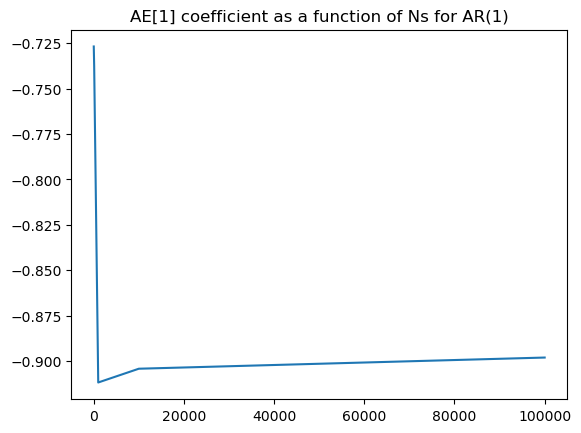

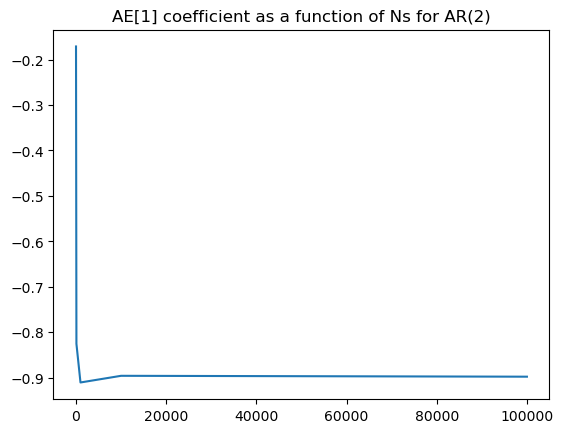

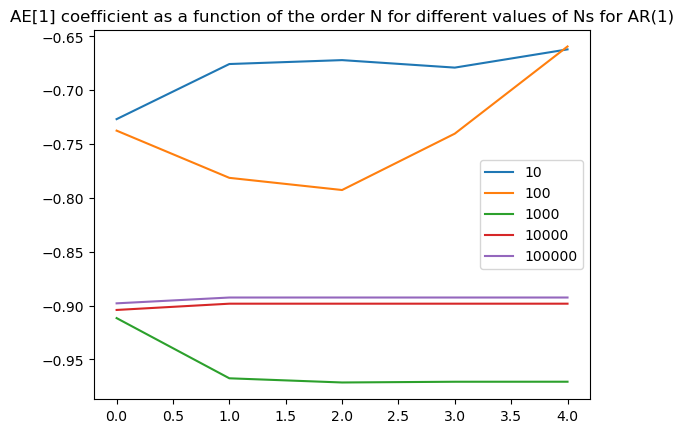

In [24]:
#7-
Ns_values = [10, 100, 1000, 10000,100000]
results = {}
for n in Ns_values:
    w = gaussian (n, sigma)
    x1 = sp.signal.lfilter([1], a1, w)
    x2 = sp.signal.lfilter([1], a2, w)
    results[n] = {
        'AR1': [],
        'AR2': []
    }

    for order in range(1, 5 + 1):
        # Estimate parameters
        ae1 = ar_yule(x1, order)
        ae2 = ar_yule(x2, order)

        # Store results
        results[n]['AR1'].append(ae1)
        results[n]['AR2'].append(ae2)
np.random.seed(42)  # for reproducibility
# Print results for the correct orders
print("AR(1) Model Results:")
print("True coefficients:", [1, -0.9])
for Ns in results:
    print(f"\nNs = {Ns}:")
    for i in range(1, 5 + 1):
        print(f'Estimated coefficients for N={i}:', results[Ns]['AR1'][i-1])

print("\nAR(2) Model Results:")
print("True coefficients:", [1, -0.9, 0.8])
for Ns in results:
    print(f"\nNs = {Ns}:")
    for i in range(2, 5 + 1):
        print(f'Estimated coefficients for N={i}:', results[Ns]['AR2'][i-1])

    
pl.plot(Ns_values,[results[Ns]['AR1'][0][1] for Ns in Ns_values])
pl.title("AE[1] coefficient as a function of Ns for AR(1)")
pl.show()
pl.plot(Ns_values,[results[Ns]['AR2'][1][1] for Ns in Ns_values])
pl.title("AE[1] coefficient as a function of Ns for AR(2)")
pl.show()
for n in Ns_values:
    pl.plot(np.arange(5),[results[n]['AR1'][i][1] for i in [0,1,2,3,4]], label=f'{n}')
pl.title("AE[1] coefficient as a function of the order N for different values of Ns for AR(1)")
pl.legend()

The first curve we see above is of how the second (first after 1) coeft of AR(1) changes over different values of Ns. We see with N=1 that the coefficient converges towards the true value(-0.9) as Ns becomes very large. This shows that increasing the number of samples enhances the AR coefficient approximation. This also holds true for AR(2). 

However over different orders as the order increases as the cpefficients become more close to the real valuefor large Ns. However, with smaller Ns (100 for instance) we see that the estimation strays away from the true values as the order becomes larger than the true order. This is because increasing the order means having more coefficients to estimate and therefore needing more samples to accurately estimate them. 

In [25]:
#8-
def get_psd_ar(a,f):
    psd = np.zeros(len(f))
    
    for i, freq in enumerate(f):
        transfer_function = 1
        for k in range(1, len(a)):
            transfer_function += a[k] * np.exp(-1j * k * 2 * np.pi * freq)
        psd[i] = np.abs(sigma**2 / transfer_function)**2
    
    return psd

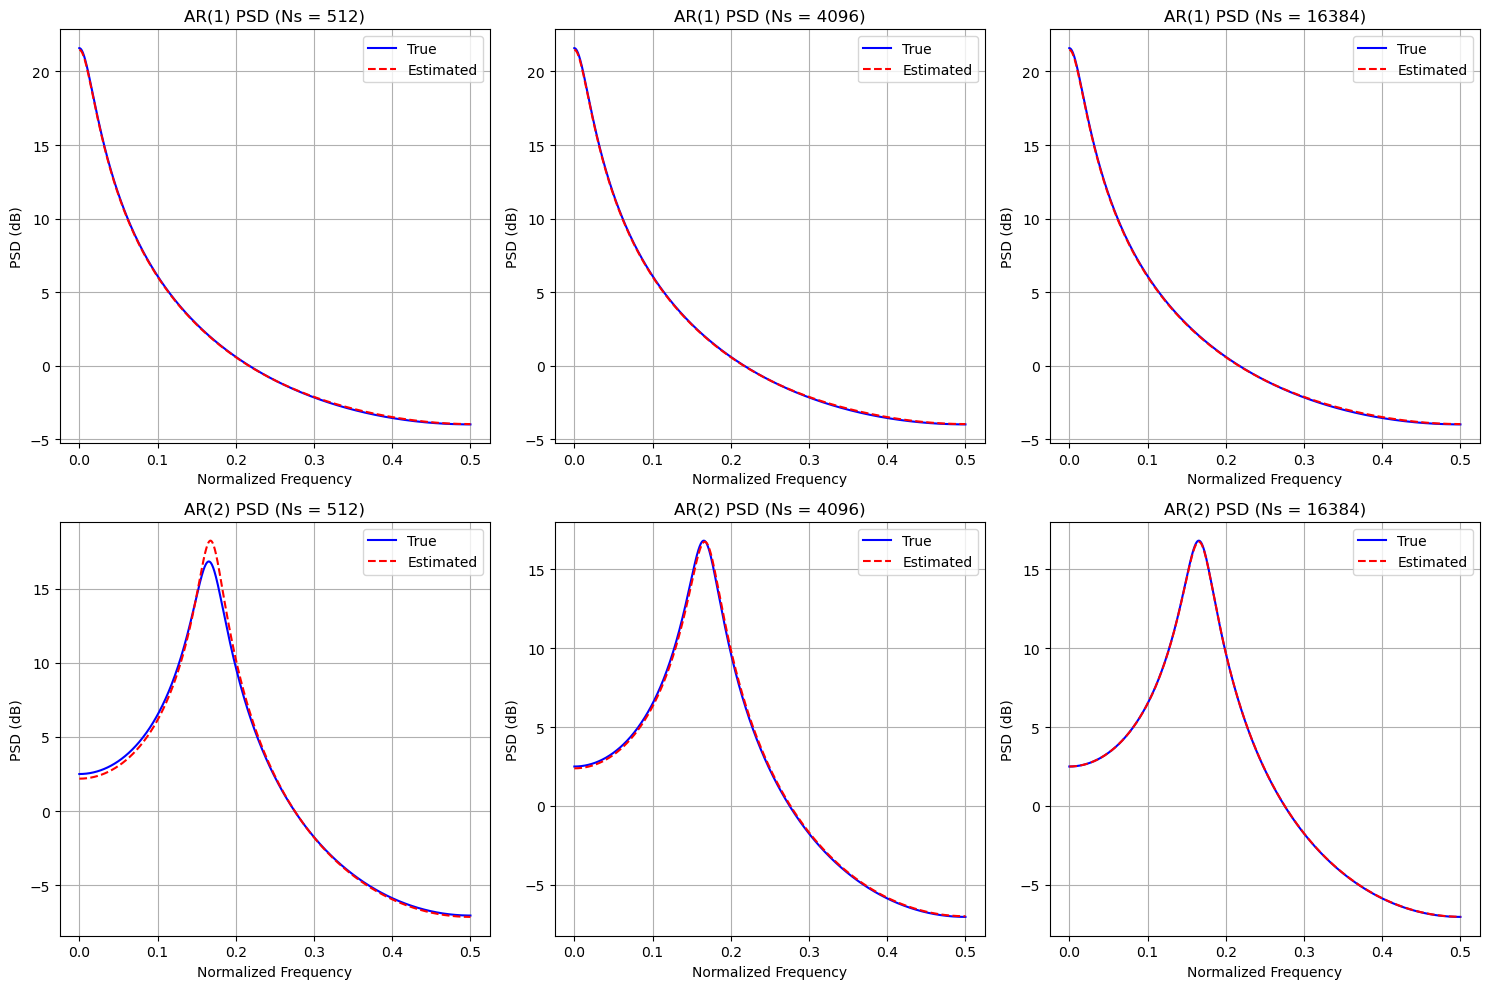

In [26]:
#9-
Ns_values = [512, 4096, 16384]

# Frequencies for PSD calculation
f = np.linspace(0, 0.5, 1000)  # Normalized frequencies

pl.figure(figsize=(15, 10))

for i, Ns in enumerate(Ns_values):
    # Generate signals
    w = np.random.randn(Ns)
    x1 = sp.signal.lfilter([1], a1, w)
    x2 = sp.signal.lfilter([1], a2, w)
    
    # Estimate AR parameters
    a1_est = ar_yule(x1, 1)
    a2_est = ar_yule(x2, 2)
    
    # Calculate PSDs
    psd1_true = get_psd_ar(a1, f)
    psd1_est = get_psd_ar(ae1, f)
    psd2_true = get_psd_ar(a2, f)
    psd2_est = get_psd_ar(a2_est, f)
    
    # Plot AR(1)
    pl.subplot(2, 3, i+1)
    pl.plot(f, 10*np.log10(psd1_true), 'b-', label='True')
    pl.plot(f, 10*np.log10(psd1_est), 'r--', label='Estimated')
    pl.grid(True)
    pl.title(f'AR(1) PSD (Ns = {Ns})')
    pl.xlabel('Normalized Frequency')
    pl.ylabel('PSD (dB)')
    pl.legend()
    
    # Plot AR(2)
    pl.subplot(2, 3, i+4)
    pl.plot(f, 10*np.log10(psd2_true), 'b-', label='True')
    pl.plot(f, 10*np.log10(psd2_est), 'r--', label='Estimated')
    pl.grid(True)
    pl.title(f'AR(2) PSD (Ns = {Ns})')
    pl.xlabel('Normalized Frequency')
    pl.ylabel('PSD (dB)')
    pl.legend()

pl.tight_layout()
pl.show()

AR(1) model acts as a low-pass filter (confirms our earlier FFT observation)

The coefficient -0.9 creates strong attenuation at high frequencies

AR(2) model shows more complex frequency response

Allows a band of higher frequencies to pass through
Explains the "crisper" sound we heard.
The combination of coefficients [-0.9, 0.8] creates a band pass


Higher Ns values give PSD that is much closer to the theoretical values and are almost a perfect reconstruction

#10-

Cf question 3

AR2 seems to have higher frequencies while AR1 is more muffled and has lower frequencies. This is compatible with the FFT and PSD analysis we have done before.



##### 2.2 AR modeling of real life signals

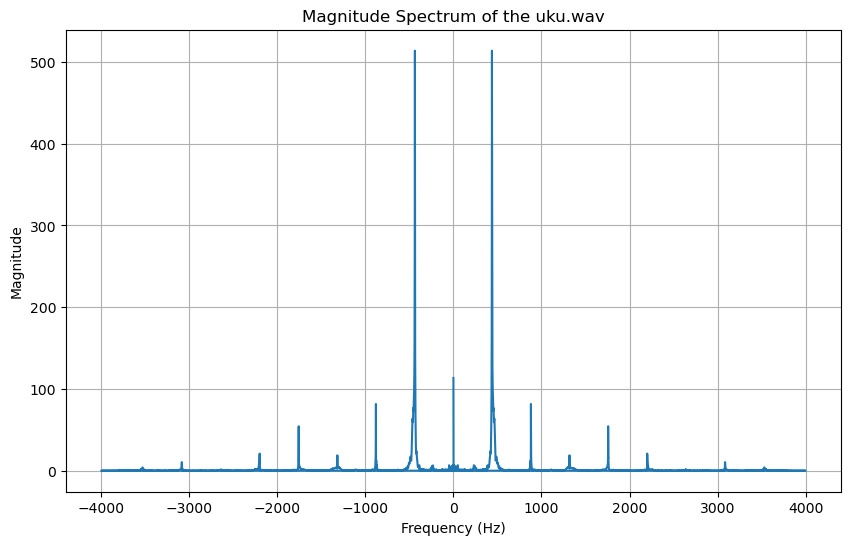

Fundamental frequency (Hz): 437.36842105263156
Normalized fundamental frequency: 0.1093421052631579


In [27]:
#1-
fs, x = sp.io.wavfile.read('uku.wav')

x = x / np.max(np.abs(x)) 

f = np.fft.fftfreq(len(x), 1/fs)  # fgrequency array
X_fft = np.fft.fft(x) 

X_mag = np.abs(X_fft)

pl.figure(figsize=(10, 6))
pl.plot(f, X_mag)  
pl.xlabel('Frequency (Hz)')
pl.ylabel('Magnitude')
pl.title('Magnitude Spectrum of the uku.wav')
pl.grid(True)
pl.show()

# The fundamental frequency corresponds to the peak of the spectrum
peak_idx = np.argmax(X_mag[:len(x)//2])  
f0 = f[peak_idx]  # in Hz
f0_normalized = f0 / (fs / 2)  # normalized freq
print(f"Fundamental frequency (Hz): {f0}")
print(f"Normalized fundamental frequency: {f0_normalized}")

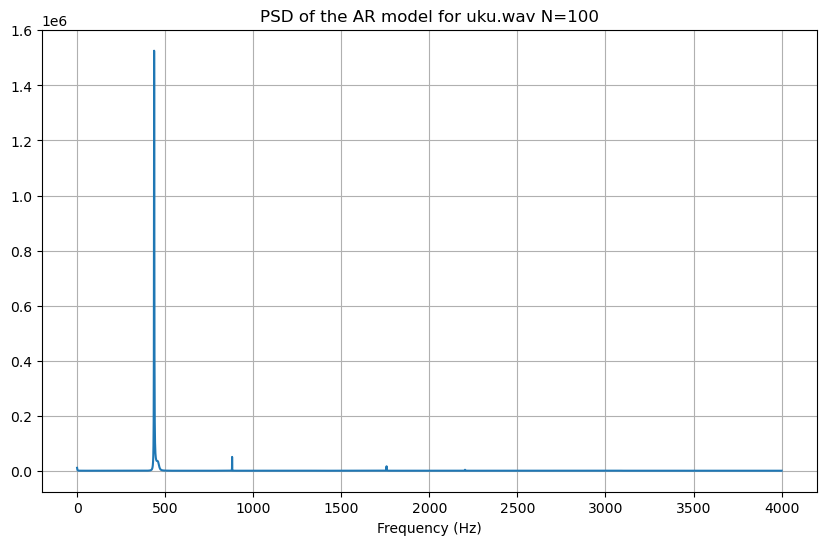

Frequency with highest PSD value (Hz): 437.42597710225033


In [28]:
#2-
N = 100
f = np.linspace(0, 0.5, len(x) // 2) #normalized freq
ae = ar_yule(x,N) #AR model estimation
psde = get_psd_ar(ae, f) #PSD estimation
pl.figure(figsize=(10, 6))
pl.plot(f*fs,psde)
pl.xlabel('Frequency (Hz)')
pl.title('PSD of the AR model for uku.wav N=100')
pl.grid(True)
pl.show()

fund_idx = np.argmax(psde)  
fund= f[fund_idx]*fs  # in Hz
print(f"Frequency with highest PSD value (Hz): {fund}")

The estimated PSD is similar to the spectrum of the signal in the way that the fundamental frequency has the highest power. However the plot is smoother and the effect of noise is less visible. This is because the AR model gives us a parametric representation that captures the important frequency components, allowing a better interpretation. 

And as we saw in the course, the low value of N=100 is a good compromise to have a smooth curve without loosing too much info.

In [29]:
#3-
length = 3
N = length*fs

w = gaussian (N, sigma)

signal = sp.signal.lfilter([1], ae, w)
signal = signal/np.max(np.abs(signal)) 

scipy.io.wavfile.write('ARgaussian.wav', fs, signal)

We hear the original ukulele note stretched over the entire three seconds because the excitation is a white noise whereas the original uku.wav is shorter in time because it is due to plucking a string. 

The AR model effectively captures the resonant frequencies and harmonic content of the ukulele note, preserving the tonal characteristics however it sounds synthetic and a bit hissy.

In [30]:
#4-

period_samples = int(fs / f0)  # Number of samples per period

dirac_comb = np.zeros(N)
for i in range(0, N, period_samples):
    dirac_comb[i] = 1

x_dirac = sp.signal.lfilter([1], ae, dirac_comb)
x_dirac = x_dirac / np.max(np.abs(x_dirac))

scipy.io.wavfile.write('ARdirac_comb.wav', fs, x_dirac)

We again hear the ukulele note sustained over 3 seconds with better tonal quality. It is even closer to the original note because we chose the fundamental frequency for the dirac comb, it sounds smoother and more musical.

The dirac comb therefore enhances the quality of the synthesized sound and fits better to the original signal compared to Gaussian noise.

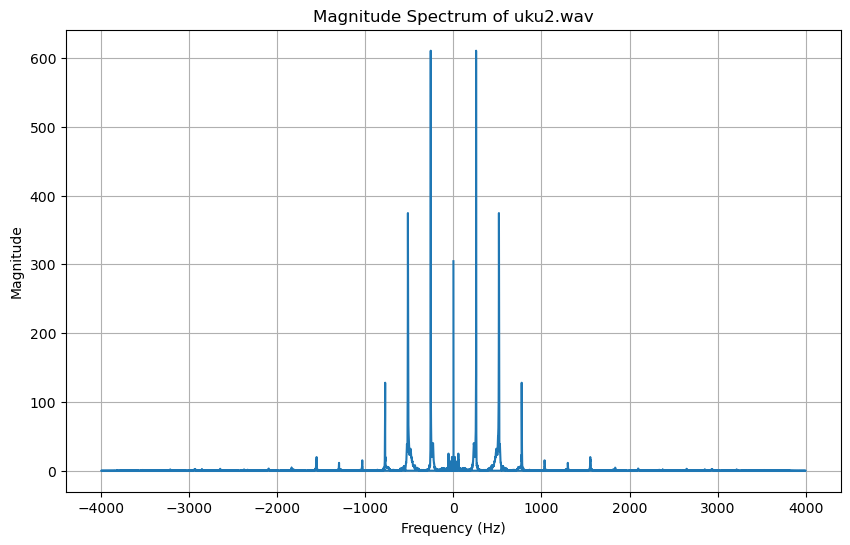

Fundamental frequency (Hz): 257.5
Normalized fundamental frequency: 0.064375


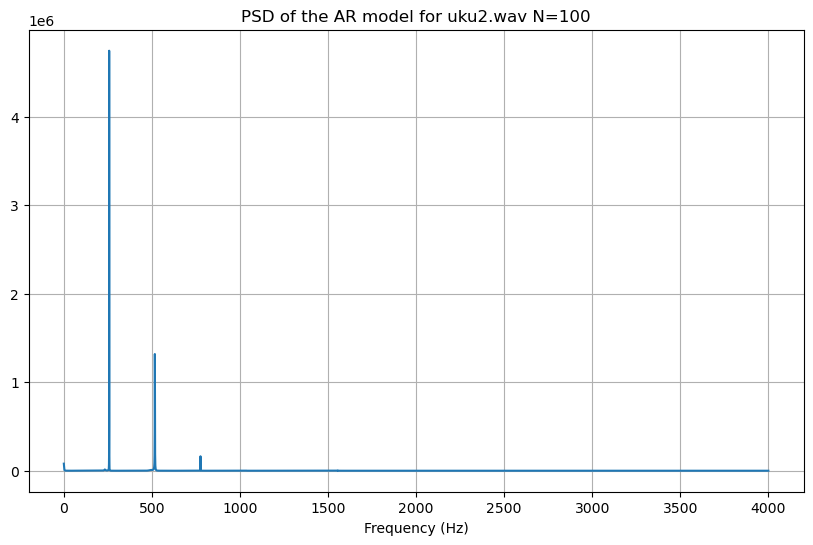

Frequency with highest PSD value (Hz): 257.5268257110116


In [31]:
#5-
fs, y = sp.io.wavfile.read('uku2.wav')
y = y / np.max(np.abs(y)) 
f = np.fft.fftfreq(len(y), 1/fs)  # fgrequency array
Y_fft = np.fft.fft(y) 
Y_mag = np.abs(Y_fft)
pl.figure(figsize=(10, 6))
pl.plot(f, Y_mag)  
pl.xlabel('Frequency (Hz)')
pl.ylabel('Magnitude')
pl.title('Magnitude Spectrum of uku2.wav')
pl.grid(True)
pl.show()
#fundamental freq
peak_idx = np.argmax(Y_mag[:len(x)//2])  
f02 = f[peak_idx]  # in Hz
f02_normalized = f02 / (fs / 2)  # normalized freq
print(f"Fundamental frequency (Hz): {f02}")
print(f"Normalized fundamental frequency: {f02_normalized}")

N = 100
f = np.linspace(0, 0.5, len(y) // 2) #normalized freq
ae2 = ar_yule(y,N)
psde2 = get_psd_ar(ae2, f) #PSD estimation
pl.figure(figsize=(10, 6))
pl.plot(f*fs,psde2)
pl.xlabel('Frequency (Hz)')
pl.title('PSD of the AR model for uku2.wav N=100')
pl.grid(True)
pl.show()
fund_idx = np.argmax(psde2)  
fund= f[fund_idx]*fs  # in Hz
print(f"Frequency with highest PSD value (Hz): {fund}")

length = 3
N = length*fs

w = gaussian (N, sigma)

y_gauss = sp.signal.lfilter([1], ae2, w)
y_gauss = y_gauss/np.max(np.abs(y_gauss)) 

scipy.io.wavfile.write('ARgaussian2.wav', fs, y_gauss)


period_samples = int(fs / f02)  # Number of samples per period

dirac_comb = np.zeros(N)
for i in range(0, N, period_samples):
    dirac_comb[i] = 1

y_dirac = sp.signal.lfilter([1], ae2, dirac_comb)
y_dirac = y_dirac / np.max(np.abs(y_dirac))

scipy.io.wavfile.write('ARdirac_comb2.wav', fs, y_dirac)

The same remarks can be made about uku2.wav. The AR PSD plot is smoother than the frequency spectrum all while showing the main frequency components. The dirac comb exitation fits better the original sound.

In [32]:
#6-

### 3 Wiener filtering

##### 3.1 Simulated signal

In [33]:
#1-
f0 = 0.1
Ns = 1024
time = np.arange(Ns)
phi = np.random.uniform(0, 2 * np.pi) 
y = np.cos(2*np.pi*f0*time + phi) #noiseless signal
x = y + gaussian(Ns,sigma) #noisy signal

#2-
Like before, the theoretical autocorrelations for both x and y are:
    
$R_y[k] = \frac{1}{2}\cos(2\pi f_0 k)$

$R_x[k]=\frac{1}{2}\cos(2\pi f_0 k) + \sigma^2 \delta(k)$

The Weiner Hopf linear problem : $R_x h = r_{xy}$  where we want $h$ to be the optimal FIR filter to denoise $x$ and $r_{xy}$ the cross correlation between $x$ and $y$

\begin{aligned}
r_{xy}[k] &= \mathbb{E}[(\cos(2\pi f_0 n + \phi)+W[n])\cos(2\pi f_0 (n+k)+\phi)]\\
& = \frac{1}{2} \mathbb{E}[[\cos(2\pi f_0 k) + \cos(4\pi f_0 +2\pi f_0 k + 2\phi)]] + \mathbb{E}[W[n]cos(2\pi f_0 (n+k)+\phi)]\\
& = \frac{1}{2}\cos(2\pi f_0 k) + 0  
\end{aligned}

In [34]:
#2-Weiner linear program using theoretical correlations
def Weiner_filter(order,Ns,x,y):
    lags = np.arange(0, N)
    rxy = (1/2)*np.cos(2*np.pi*f0*lags)
    Rx = (1/2)*np.cos(2*np.pi*f0*lags)
    Rx[0]+= sigma**2
    r = Rx[:order+1]
    rcross = rxy[:order+1]
    h =sp.linalg.solve_toeplitz(r,rcross)
    return h

h = Weiner_filter(10, Ns, x, y)
print("Estimated optimal filter for order=10: ",h)

Estimated optimal filter for order=10:  [ 0.11904762  0.09631155  0.03678774 -0.03678774 -0.09631155 -0.11904762
 -0.09631155 -0.03678774  0.03678774  0.09631155  0.11904762]


In [35]:
#Weiner linear program using empirical correlations

#def Weiner_filter_empirical(order,N,x,y):
#    rxy = sp.signal.correlate(x, y, mode='full') / N
#    Rx = sp.signal.correlate(x, x, mode='full') / N
#    r = Rx[len(Rx)//2:]
#    rcross = rxy[len(rxy)//2:] 
#    r = r[:order+1]
#    rcross = rcross[:order+1]
#    h =sp.linalg.solve_toeplitz(r,rcross)
#    return h
#h = Weiner_filter_empirical(10, Ns, x, y)
#print("Estimated optimal filter for order=10: ",h)

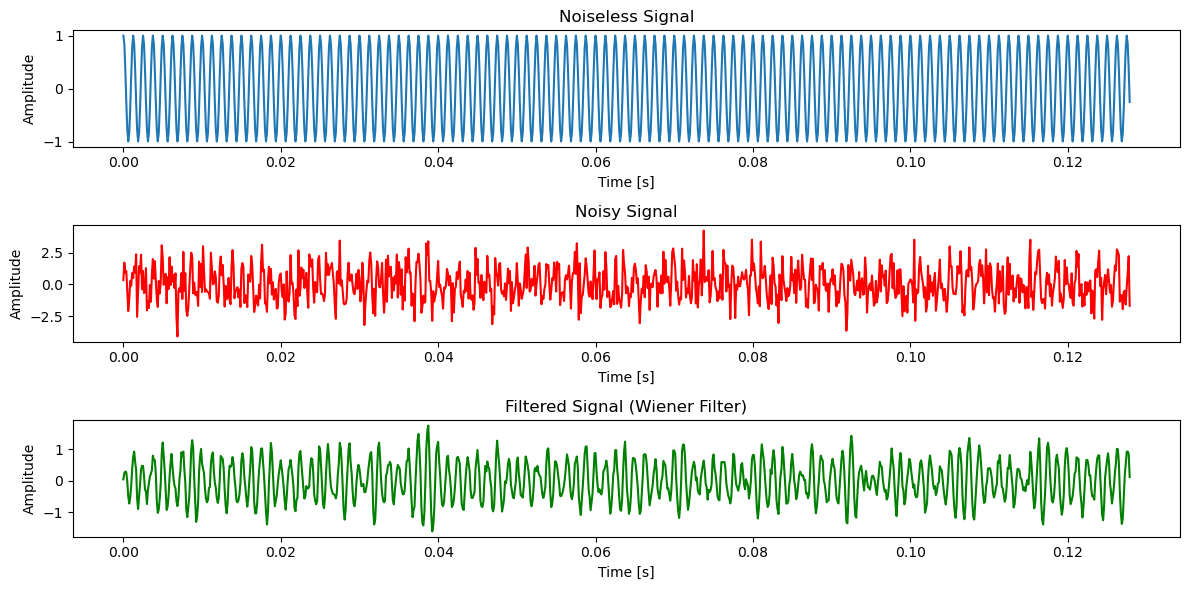

In [36]:
#3-
#apply the filter h to the noisy signal
filtered_signal = sp.signal.lfilter(h, 1, x)

fs = 8000
x_scaled = x / np.max(np.abs(x))
scipy.io.wavfile.write('x.wav', fs, x_scaled)
y_scaled = y / np.max(np.abs(y))
scipy.io.wavfile.write('y.wav', fs, y_scaled)
filtered_signal_scaled = filtered_signal / np.max(np.abs(filtered_signal))
scipy.io.wavfile.write('x_Weiner.wav', fs, filtered_signal_scaled)

pl.figure(figsize=(12, 6))
t = np.arange(Ns) / fs

# Plot y
pl.subplot(3, 1, 1)
pl.plot(t, y, label='Noiseless Signal')
pl.title('Noiseless Signal')
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')

# Plot x
pl.subplot(3, 1, 2)
pl.plot(t, x, label='Noisy Signal', color='r')
pl.title('Noisy Signal')
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')

# Plot the filtered signal
pl.subplot(3, 1, 3)
pl.plot(t, filtered_signal, label='Filtered Signal', color='g')
pl.title('Filtered Signal (Wiener Filter)')
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')

pl.tight_layout()
pl.show()

After we applied the Weiner filter, the signal is closer to the noiseless signal. The filter removed most of the noise althought not entirely. This improvement is evident in the plots above, where the sine wave variations are more pronounced in the filtered signal compared to the noisy one. The enhancement is also noticeable when listening to the generated audio files.

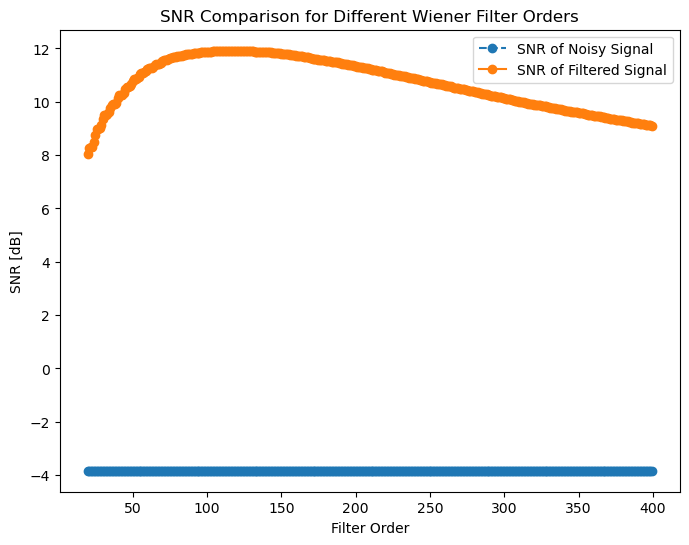

The optimal filter order is 114 based on maximum SNR. 11.915793623321553


In [37]:
#4-
def compute_snr(signal, noise):
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    SNR = 10 * np.log10(signal_power / noise_power)
    return SNR

# Broad range of orders
orders = [1, 5, 10, 50, 100, 1000,1024, 2048, 4096]
# The optimal value is around the order N = 100
# Zoom around the optimal value (around 100)
orders = np.arange(20,400)

snr_noisy = []
snr_filtered = []
for order in orders:

    h = Weiner_filter(order, Ns, x, y)

    filtered_signal = sp.signal.lfilter(h, [1], x)

    noise = x-y  # Noise in the noisy signal
    snr_noisy_value = compute_snr(y, noise)  # SNR for noisy signal
    snr_filtered_value = compute_snr(y, filtered_signal - y)  # SNR for filtered signal

    snr_noisy.append(snr_noisy_value)
    snr_filtered.append(snr_filtered_value)


# comparing SNRs
pl.figure(figsize=(8, 6))
pl.plot(orders, snr_noisy, label="SNR of Noisy Signal", marker='o', linestyle='--')
pl.plot(orders, snr_filtered, label="SNR of Filtered Signal", marker='o')
pl.xlabel("Filter Order")
pl.ylabel("SNR [dB]")
pl.legend()
pl.title("SNR Comparison for Different Wiener Filter Orders")
pl.show()

# optimal order based on SNR
optimal_order = orders[np.argmax(snr_filtered)]
print(f"The optimal filter order is {optimal_order} based on maximum SNR.", np.max(snr_filtered))

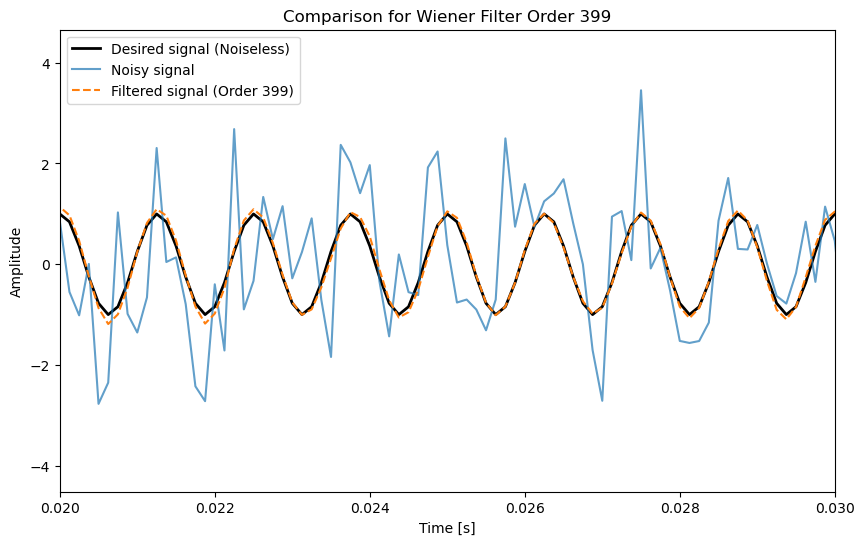

In [38]:
# plotting the signals for comparison
h = Weiner_filter(optimal_order, Ns, x, y)
filtered_signal = sp.signal.lfilter(h, [1], x)
pl.figure(figsize=(10, 6))
pl.plot(t, y, label='Desired signal (Noiseless)', color='black', linewidth=2)
pl.plot(t, x, label='Noisy signal', alpha=0.7)
pl.plot(t, filtered_signal, label=f'Filtered signal (Order {order})', linestyle='--')
pl.legend()
pl.xlim(0.02,0.03)
pl.title(f"Comparison for Wiener Filter Order {order}")
pl.xlabel("Time [s]")
pl.ylabel("Amplitude")

pl.show()

We see that increasing the order leads to better denoising as the SNR increases.

Using the theoretical correlation matrices, the optimal order is around 100, more precisely 114, with an optimal value : $SNR_{dB} = 11.91$ 

However, we notice that when using the empirical correlation and autocorrelation matrices to compute the filter, the optimal order corresponds to the number of samples $N= Ns=1024$ with a value $SNR_{dB} = 12.38$

##### 3.2 Filtering noise in real life signal

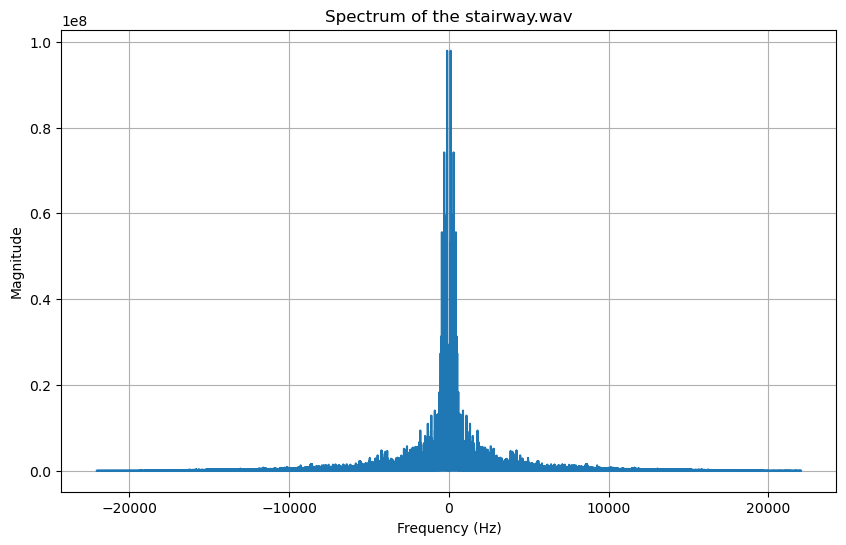

sampling frequency =  44100


In [39]:
#1-
fs, y = sp.io.wavfile.read('stairway.wav')

f = np.fft.fftfreq(len(y), 1/fs)  # fgrequency array
Y_mag = np.abs(np.fft.fft(y))

pl.figure(figsize=(10, 6))
pl.plot(f, Y_mag)  
pl.xlabel('Frequency (Hz)')
pl.ylabel('Magnitude')
pl.title('Spectrum of the stairway.wav')
pl.grid(True)
pl.show()

print("sampling frequency = ", fs)


In [40]:
#2-

w= gaussian(len(y),np.std(y))
x = y + w
x_scaled = x / np.max(np.abs(x)) 

sp.io.wavfile.write('stairwayb2.wav', fs, x_scaled)


The file contains the original stairway.wav music with a static corresponding to the gaussian noise of the same variance.

In [41]:
#3- Causal weiner filter using empirical correlations

def Weiner_filter_empirical(N,Ns,x,y):
    rxy = sp.signal.correlate(x, y, mode='full') / Ns
    Rx = sp.signal.correlate(x, x, mode='full') / Ns
    r = Rx[len(x)-1:len(x)-1+N]  #causality
    rcross = rxy[len(x)-1:len(x)-1+N] 
    h =sp.linalg.solve_toeplitz(r,rcross)    
    return h

x = x / np.max(np.abs(x))
y = y / np.max(np.abs(y))
# We'll take N=100 for example because it was the optimal order before
N=100
h = Weiner_filter_empirical(N, len(y), x, y)
print("Estimated causal weiner filter for stairwayb2.wav order=100: ",h)

Estimated causal weiner filter for stairwayb2.wav order=100:  [ 1.95691183e-01  1.64027482e-01  1.24839778e-01  9.19446502e-02
  6.67572974e-02  4.89396077e-02  3.53539074e-02  2.51996413e-02
  2.01036334e-02  1.65977023e-02  1.54648111e-02  1.30550982e-02
  9.57330877e-03  6.59806513e-03  5.60802986e-03  6.54594308e-03
  8.08408831e-03  9.17394293e-03  9.78257991e-03  9.63066855e-03
  8.94446966e-03  6.72664413e-03  4.16184425e-03  8.28433026e-04
 -2.64982722e-03 -4.28867830e-03 -4.81374336e-03 -4.89551964e-03
 -3.80222013e-03 -1.23853844e-03  9.18447095e-04  2.14926175e-03
  2.38485230e-03  9.50413086e-04 -6.01548645e-04 -3.41054459e-03
 -5.93755852e-03 -7.65201293e-03 -7.89498350e-03 -7.58767893e-03
 -6.42172634e-03 -4.36689083e-03 -3.44293631e-03 -3.16659812e-03
 -2.15056646e-03 -9.36528655e-04  2.26054118e-04 -7.72475922e-04
 -1.82199675e-03 -1.98727589e-03 -2.33889998e-03 -2.16134072e-03
 -2.60851654e-03 -2.81530519e-03 -2.85943785e-03 -2.70032472e-03
 -1.93180447e-03 -2.30584437

SNR before filtering: -0.09 dB
SNR after filtering (N=100): 7.02 dB


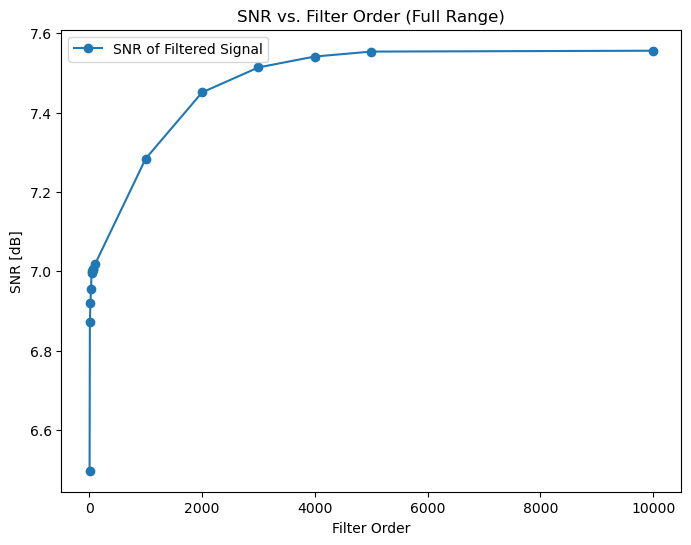

The SNR becomes stationary (plateau) starting from filter order = 5000. SNR=7.553813194150424


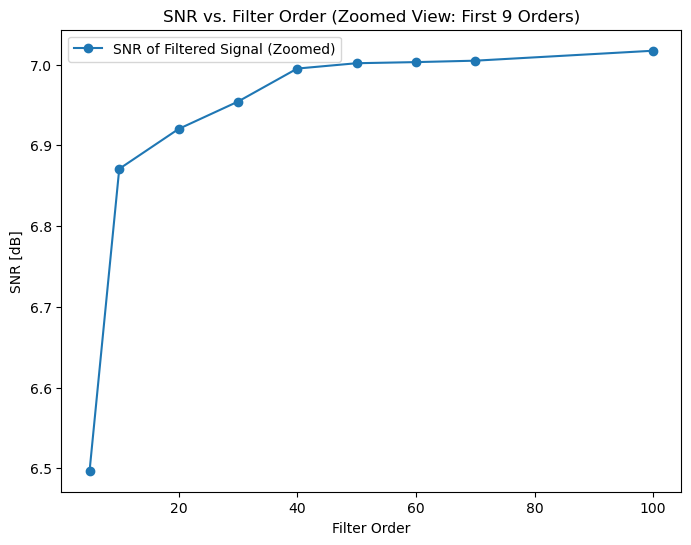

The SNR becomes stationary (plateau) starting from filter order = 50. SNR=7.001778303059711.


In [42]:
#4-
#saving filtered signal
filtered_stairway = sp.signal.lfilter(h, 1, x)
scaled_stairway = filtered_stairway / np.max(np.abs(filtered_stairway)) 
sp.io.wavfile.write('stairwayb2noiseless_weiner.wav', fs, scaled_stairway)

#SNR values
snr_noisy_value = compute_snr(y, x-y)  # SNR for noisy signal
snr_filtered_value = compute_snr(y, filtered_stairway - y)  # SNR for filtered signal
print(f"SNR before filtering: {snr_noisy_value:.2f} dB")
print(f"SNR after filtering (N={N}): {snr_filtered_value:.2f} dB")

#effect of N
orders = [5, 10,20,30,40, 50, 60, 70, 100, 1000, 2000, 3000, 4000,5000, 10000]
snr_noisy = []
snr_filtered = []
for order in orders:

    h = Weiner_filter_empirical(order, N, x, y)

    filtered_stairway = sp.signal.lfilter(h, [1], x)

    snr_noisy_value = compute_snr(y, x-y)  # SNR for noisy signal
    snr_filtered_value = compute_snr(y, filtered_stairway - y)  # SNR for filtered signal

    snr_noisy.append(snr_noisy_value)
    snr_filtered.append(snr_filtered_value)


def detect_plateau_start(orders, snr_filtered, threshold, window_size):
    #absolute differences between consecutive SNR values
    variations = np.abs(np.diff(snr_filtered))
    #the first point where the smoothed variation is below the threshold
    for i, value in enumerate(variations):
        if value < threshold:
            return i + window_size - 1  #returns index
    
    return -1
# SNR(N) evolution
pl.figure(figsize=(8, 6))
pl.plot(orders, snr_filtered, label="SNR of Filtered Signal", marker='o')
pl.xlabel("Filter Order")
pl.ylabel("SNR [dB]")
pl.legend()
pl.title("SNR vs. Filter Order (Full Range)")
pl.show()
plateau_start_index = detect_plateau_start(orders, snr_filtered, 0.01, 10)
if orders[plateau_start_index] != -1:
    print(f"The SNR becomes stationary (plateau) starting from filter order = {orders[plateau_start_index]}.", f"SNR={snr_filtered[plateau_start_index]}")
else:
    print("No plateau detected.")
pl.figure(figsize=(8, 6))
pl.plot(orders[:9], snr_filtered[:9], label="SNR of Filtered Signal (Zoomed)", marker='o')
pl.xlabel("Filter Order")
pl.ylabel("SNR [dB]")
pl.legend()
pl.title("SNR vs. Filter Order (Zoomed View: First 9 Orders)")
pl.show()
plateau_start_index = detect_plateau_start(orders[:9], snr_filtered[:9], 0.1, 5)
if plateau_start_index != -1:
    print(f"The SNR becomes stationary (plateau) starting from filter order = {orders[plateau_start_index]}.", f"SNR={snr_filtered[plateau_start_index]}.")
else:
    print("No plateau detected.")


The original noisy signal x = stairwayb2.wav has a SNR=-0.09dB which is very close to the theoretical value SNR=0dB

The filtered signal stairwayb2noiseless_weiner.wav has less noise than the original x , the corresponding SNR is also higher (=7.02dB) indicating noise reduction.

In [43]:
optimal_order = orders[np.argmax(snr_filtered)]
print(f"The optimal filter order is {optimal_order} based on maximum SNR.", np.max(snr_filtered))

The optimal filter order is 10000 based on maximum SNR. 7.555992317084228


N is the total number of samples used in the filter.
Delay in causal Wiener filtering corresponds to waiting for all N samples to pass through:

$Delay= \frac{N}{fs}$

The first plateau happens around N=50, giving an SNR value that stabilizes around 7.0 dB. The delay for real time applications is : Delay = N/fs = 50/44100 = 1ms

A second more fine (variation<=0.01) plateau happends around N=5000, with SNR close to 7.5 dB. The corresponding delay for real time applications is : Delay = N/fs = 5000/44100 = 0.1s



For real-time applications, smaller N is preferred to minimize delay. While N=5000 enhances SNR, this comes at the cost of increased delay = 0.1 s which can be critical in real time signals whereas 1 millisecond is acceptable.


*Trade-off Between Delay and Filtering Quality:*

Increasing the filter order (and thus the delay) often improves the filter's ability to accurately model and filter the noise (higher SNR), as more coefficients provide better adaptation to the signal's structure.
However, excessive delay may not be acceptable in real-time applications, such as audio or communication systems, where low latency is critical. The delay imposes a limit on how responsive the system can be to changes in the input. 

In [44]:
#5- using proxy y2
fs2, y2 = sp.io.wavfile.read('stairway2.wav')  #proxy signal
fs, x = sp.io.wavfile.read('stairwayb2.wav')  # Noisy signal


x = x / np.max(np.abs(x))
y = y / np.max(np.abs(y))
y2 = y2 / np.max(np.abs(y2))


min_len = min(len(x), len(y2))  
x = x[:min_len]
y2 = y2[:min_len]

N=50
h2 = Weiner_filter_empirical(N, len(y2), x, y2)
filtered_stairway2 = sp.signal.lfilter(h2, [1], x)
scaled_filtered_stairway2 = filtered_stairway2 / np.max(np.abs(filtered_stairway2))
sp.io.wavfile.write('stairwayb2proxy_weiner.wav', fs, filtered_stairway2)


snr_noisy_y = compute_snr(y, x-y)  # SNR for noisy signal
snr_filtered_y = compute_snr(y, filtered_stairway2 - y)

# Print the SNR results
print(f"SNR before filtering: {snr_noisy_y:.2f} dB")
print(f"SNR after filtering N={N}: {snr_filtered_y:.2f} dB")


SNR before filtering: -0.09 dB
SNR after filtering N=50: 0.07 dB


Audio quality: Ther audio stairwayb2proxy_weiner.wav is definitely less noisy than the original stairwayb2.wav, the static sound is lower but it is not as good as stairwayb2noiseless_weiner.wav that was filtered using the noiseless signal y.
    
SNR: the value is slightly higher 0.07 dB than the SNR before filtering -0.09 dB and positive but it is still very low meaning the noise was reduced a little but not as much as filtering using y. 

Using the proxy for estimating in FFT Wiener filtering typically results in lower reconstruction quality compared to using the true clean signal.

In [45]:
#6- Offline signal, Weiner filtering with FFT
_, y = sp.io.wavfile.read('stairway.wav')     # Clean signal
fs, x = sp.io.wavfile.read('stairwayb2.wav')  # Noisy signal

x = x / np.max(np.abs(x))
y = y / np.max(np.abs(y))

Y_f = sp.fft.fft(y)
X_f = sp.fft.fft(x)
w = x-y

# Estimate the Power Spectral Densities (PSDs)
S_Y_f = np.abs(Y_f) ** 2/len(y) 
S_W_f = np.mean(w**2)/2*np.ones_like(S_Y_f)


# Compute the Wiener filter in the frequency domain
H_f = S_Y_f / (S_Y_f+S_W_f)

# Apply the Wiener filter in the frequency domain
X_f_filtered = H_f * X_f

# Inverse FFT to get the filtered signal in the time domain
x_filtered = np.real(sp.fft.ifft(X_f_filtered))

# SNR before and after filtering
snr_noisy = compute_snr(y, x-y)  
snr_filtered = compute_snr(y, x_filtered-y)  

sp.io.wavfile.write('stairway_fftnoiseless.wav', fs, x_filtered)  # Save filtered signal

# Print the SNR results
print(f"SNR before filtering: {snr_noisy:.2f} dB")
print(f"SNR after filtering: {snr_filtered:.2f} dB")


SNR before filtering: -0.09 dB
SNR after filtering: 9.87 dB


Before filtering SNR is close to 0 which is the expected value for pure noise.

After filtering the signal to noise ratio is much higher and is positive 4.51 dB indicating that the noise is less important than the actual signal

In [46]:
#7- using proxy y2

fs, x = sp.io.wavfile.read('stairwayb2.wav')  # Noisy signal
_, y2 = sp.io.wavfile.read('stairway2.wav')     # Clean signal

x = x / np.max(np.abs(x))
y2 = y2 / np.max(np.abs(y2))

min_len = min(len(x), len(y2))  
x = x[:min_len]
y2 = y2[:min_len]



w=x-y

# Compute the FFT of the noisy and clean signals
Y_f = sp.fft.fft(y2)
X_f = sp.fft.fft(x)

# Estimate the Power Spectral Densities (PSDs)
S_Y_f = np.abs(Y_f) ** 2 /len(y2) 
S_W_f = ((np.var(w))/2)*np.ones_like(S_Y_f)

H_f = S_Y_f / (S_Y_f + S_W_f)
X_f_filtered = H_f * X_f

x_filtered = np.real(sp.fft.ifft(X_f_filtered))

snr_noisy = compute_snr(y, x-y)
snr_filtered = compute_snr(y, x_filtered-y) 

sp.io.wavfile.write('stairway_fftproxy.wav', fs, x_filtered)  

print(f"SNR before filtering: {snr_noisy:.2f} dB")
print(f"SNR after filtering: {snr_filtered:.2f} dB")


SNR before filtering: -0.09 dB
SNR after filtering: 7.72 dB


#### Analysis of the two variants of the Weiner filter (causal vs FFT)

- We noticed that the SNR provided by the FFT filter is higher than the one given by the causal filter both when using the noiseless signal y and the proxy y2.

--> Using the noiseless y:

    The FFT Wiener filter leverages the entire signal, making it generally better suited for finite signals. It uses the actual PSD so it's gives better filtering precision. It achieves near-optimal noise removal, approaching the true signal more closely.
    
    The causal filter's performance depends heavily on the filter order N relative to the signal length. A higher N can improve performance, but at the cost of increased computational complexity and potential delay. It also relies on accurate empirical correlations, which can be less reliable with finite signals. With a finite signal, PSD estimation may be less precise due to reduced spectral resolution, it still delivers moderate performance (SNR~7dB) on the noiseless signal y but can't compete with FFT filtering (SNR~10dB) due to its causality constraint.

    

    
--> Using the proxy y2:

    - The *causal Weiner filtering* is based on empirical autocorrelation and cross correlation between x and y2, For proxy signals, the PSD approximation may not align well so the causal filter struggles, emphasizing the importance of accurate PSD estimation.
    
    - On the other hand the *FFT Weiner Filtering* remains robust and exhibits better performance on proxy signal y2 than the causal one, giving an SNR value (~7dB) comparable to that given by the causal filter on the noiseless signal y.
    
However, in real-time applications when online signal processing is required, the Causal Wiener filtering is the only viable option, albeit with reduced effectiveness.